In [1]:
import numpy as np
import pandas as pd

import zipfile
import os
import glob
import cv2

In [2]:
df_train = pd.read_csv('/notebooks/train.csv')
df_train.head()

,id,img_path,A,B,C,D,E,F,G,H,I,J
0,TRAIN_00000,./train/TRAIN_00000.jpg,1,0,0,0,0,0,0,0,0,0
1,TRAIN_00001,./train/TRAIN_00001.jpg,1,0,0,0,0,0,0,0,0,0
2,TRAIN_00002,./train/TRAIN_00002.jpg,1,0,0,0,0,0,0,0,0,0
3,TRAIN_00003,./train/TRAIN_00003.jpg,1,0,0,0,0,0,0,0,0,0
4,TRAIN_00004,./train/TRAIN_00004.jpg,1,0,0,0,0,0,0,0,0,0


In [3]:
paths = glob.glob('./train/*')

In [4]:
kernel = np.ones((4,4),np.uint8)
def block_segmentation(img, kernel):
    mask = cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel,iterations=1)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    mask[mask>230] = 0
    img = cv2.bitwise_and(img, img, mask=mask)
    return img

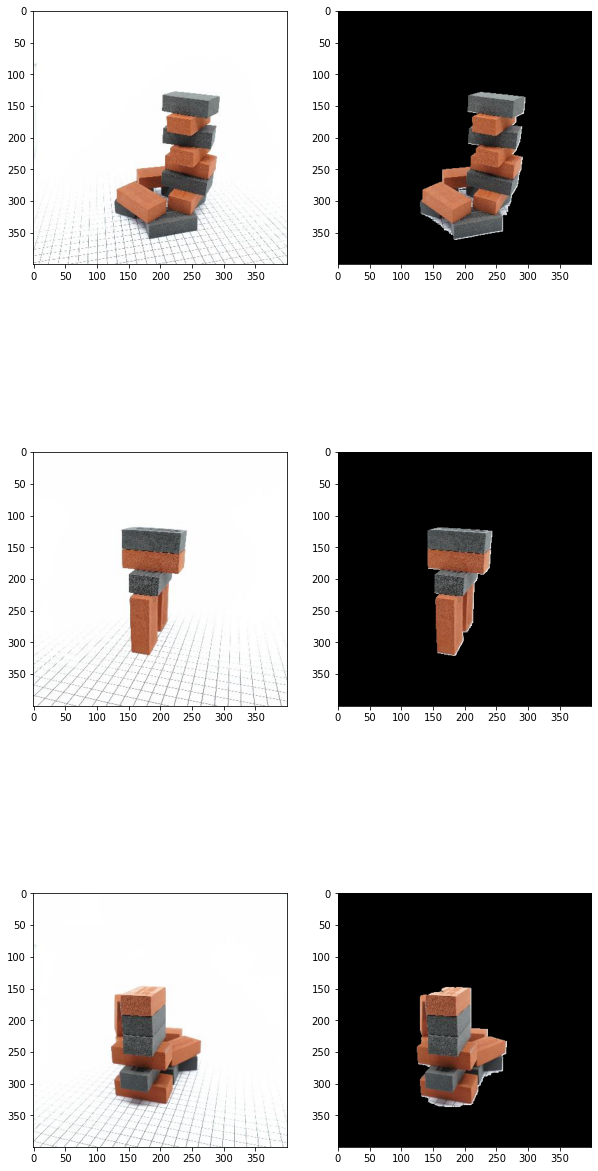

In [5]:
import matplotlib.pyplot as plt

num_sample = 3
fig, axes = plt.subplots(3,2)
fig.set_size_inches(10,num_sample*7+2)

for i in range(num_sample):
    path = np.random.choice(paths)
    img = cv2.imread(path)
    new_img = block_segmentation(img.copy(), kernel)
    axes[i, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[i, 1].imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))

In [8]:
from tqdm import tqdm
os.mkdir('./train_masked', exist_ok = True
        )
for path in tqdm(df_train.iloc[:,1]):
    img = cv2.imread(path)
    new_img = block_segmentation(img, kernel)
    
    new_path = path.split('/')
    new_path[1] = 'train_masked'
    new_path = '/'.join(new_path)
    
    cv2.imwrite(new_path, new_img)

100%|██████████| 32994/32994 [07:38<00:00, 71.96it/s] 
